# Comparative Evaluation and Combination of Audio Tempo Estimation Approaches (2011)
Results of the conference paper:

**"Comparative Evaluation and Combination of Audio Tempo Estimation Approaches"** , Zapata, Jose R.; Gómez, Emilia. AES 42nd International Conference: Semantic Audio, Ilmenau, Germany. pp. 198 - 207, Jul 2011.

http://www.aes.org/e-lib/browse.cfm?elib=15964

In [1]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading tempo estimations results
df = pd.read_excel("data/AES42_Tempo_2011.xlsx")
number_songs = len(df)
# only the first 5 rows
df.head()

,SONG,GROUNDTRUTH,Essentia,SonicBasic,qmtempo,Aubio,Beatroot,Ellis,Tzanetakis,MIRTempo,...,Alo_spec,Dix_auco,Dix_indu,Dix_trac,Klap,Sche,Tzan_hist,Tzan_mmul,Tzan_msum,Uhle
0,Abba\Gold-GreatestHits\20sec\01-DancingQueen.wav,101.010084,201.0,100.3,103.36,101.332721,100.000000,135.135135,100.0,100.748146,...,80.2881,152,202.772,201.439,101,101.8190,198,100,100,67
1,"Abba\Gold-GreatestHits\20sec\02-KnowingMe,Know...",105.755105,213.0,105.7,107.67,107.666016,109.090909,108.695652,106.5,107.416010,...,106.7432,216,106.400,212.720,108,108.0350,107,107,107,107
2,Abba\Gold-GreatestHits\20sec\03-TakeAChanceOnM...,107.142857,213.0,106.6,107.67,107.666016,105.263158,107.142857,107.5,107.171263,...,80.2881,214,106.751,214.826,108,220.0000,106,105,107,106
3,Abba\Gold-GreatestHits\20sec\04-MammaMia.wav,136.617092,136.0,136.9,139.67,135.999178,136.363636,136.363636,137.0,137.089537,...,68.3679,140,136.428,137.335,138,91.7879,135,135,135,135
4,Abba\Gold-GreatestHits\20sec\05-LayAllYourLove...,133.636421,132.0,132.5,136.00,132.512019,136.363636,66.371681,132.5,132.863812,...,133.1982,133,132.893,132.921,133,132.9380,132,132,132,132


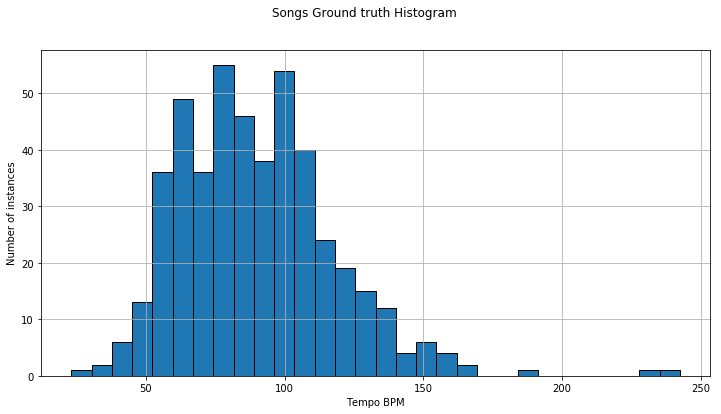

In [3]:
# Ground truth histogram
df["GROUNDTRUTH"].hist(bins=30,ec="black",figsize=(12,6))
plt.suptitle("Songs Ground truth Histogram")
plt.xlabel("Tempo BPM")
plt.ylabel("Number of instances");

## Defining evaluation functions

In [4]:
# Tempo evaluation measure 1 
def matchingFunction_1(computed,truth,accPerc):
    #normally accPerc = 4
    if ((computed >= truth*(1-accPerc/100))&(computed <= truth*(1+accPerc/100))):
        MF_1 = 1
    else:
        MF_1 = 0;
    return MF_1

In [5]:
# Tempo evaluation measure 2 
def matchingFunction_2(computed,truth,accPerc):
    # normally accuracy 4%
    if (    ((computed>=truth*(1-accPerc/100))&(computed<=truth*(1+accPerc/100))) |
        ((computed>=2*truth*(1-accPerc/100))&(computed<=2*truth*(1+accPerc/100))) |
        ((computed>=0.5*truth*(1-accPerc/100))&(computed<=0.5*truth*(1+accPerc/100))) |
        ((computed>=3*truth*(1-accPerc/100))&(computed<=3*truth*(1+accPerc/100))) |
        ((computed>=(1/3)*truth*(1-accPerc/100))&(computed<=(1/3)*truth*(1+accPerc/100)))):
        MF_2 = 1
    else:
        MF_2 = 0
    return MF_2    

In [6]:
cols_names = list(df)
del cols_names[0:2] # only Tempo estimator systems
evaluation_1 = df.loc[:, cols_names]
evaluation_2 = df.loc[:, cols_names]

In [7]:
for n in cols_names:
    evaluation_1[n] = [matchingFunction_1(df.loc[idx,n],df.loc[idx,"GROUNDTRUTH"],4) for idx in range(len(df))]
    evaluation_2[n] = [matchingFunction_2(df.loc[idx,n],df.loc[idx,"GROUNDTRUTH"],4) for idx in range(len(df))]

In [8]:
metric_1 = (evaluation_1.sum())*100/number_songs
metric_2 = (evaluation_2.sum())*100/number_songs

## General Evaluation Results

In [9]:
final_evaluation = pd.concat([metric_1,metric_2],axis=1)
final_evaluation.columns = ['Metric 1','Metric 2']
final_evaluation

,Metric 1,Metric 2
Essentia,24.516129,83.440860
SonicBasic,24.731183,50.752688
qmtempo,43.225806,80.430108
Aubio,39.354839,67.311828
Beatroot,23.225806,67.956989
Ellis,45.591398,80.645161
Tzanetakis,25.591398,66.451613
MIRTempo,30.967742,65.591398
IBT,35.913978,79.784946
BeatIt,60.430108,78.279570


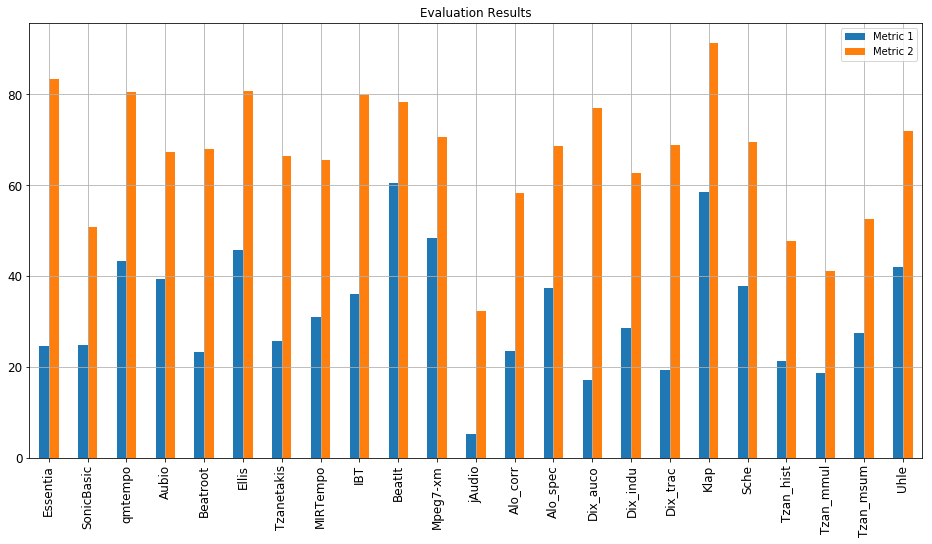

In [10]:
final_evaluation.plot(kind='bar',title ="Evaluation Results", figsize=(16,8),grid = True,fontsize=12);

## Sorted  General Evaluation results (by Metric 2)

In [11]:
final_evaluation.sort_values(by=['Metric 2'], ascending= False)

,Metric 1,Metric 2
Klap,58.494624,91.182796
Essentia,24.516129,83.440860
Ellis,45.591398,80.645161
qmtempo,43.225806,80.430108
IBT,35.913978,79.784946
BeatIt,60.430108,78.279570
Dix_auco,16.989247,76.989247
Uhle,41.935484,71.827957
Mpeg7-xm,48.387097,70.537634
Sche,37.849462,69.462366


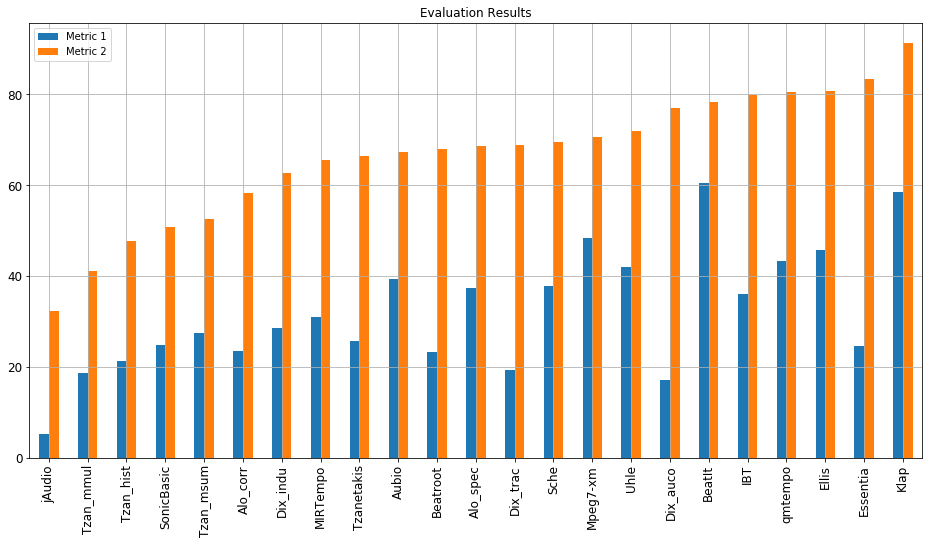

In [12]:
final_evaluation.sort_values(by=['Metric 2']).plot(kind='bar',title ="Evaluation Results", figsize=(16,8),grid = True,fontsize=12);